In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df = pd.read_csv('carpreed_preprocessed.csv')

In [3]:
df.head(10)

,price,year,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,transmission_manual,transmission_other
0,9000,16,54000,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,8500,15,62800,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2750,14,165000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,24930,3,32989,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3200,22,98186,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,3450,20,198200,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,8999,12,144497,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,10200,7,45500,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,12998,8,132867,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,17998,7,129079,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Train Test Split

In [4]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression

In [14]:
lm = LinearRegression()

In [6]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
np.mean(cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error'))

-2559.8102051565156

# Lasso Regression

In [15]:
lm_l = Lasso()

In [9]:
np.mean(cross_val_score(lm_l, X_train, y_train, scoring = 'neg_mean_absolute_error'))

-2564.3071603862513

In [10]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/10))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring = 'neg_mean_absolute_error')))

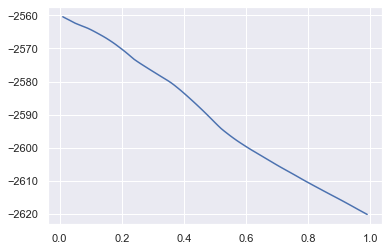

In [11]:
plt.plot(alpha, error)


# Random Forest

In [8]:
rf = RandomForestRegressor()

In [14]:
np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error'))

-1583.5384224157424

In [18]:
#we can see that the random forest regressor vastly outperformed the other models
#from here I will use a grid search to tune the model further.

# Grid Search

In [9]:
parameters = {'n_estimators':range(10, 300, 10), 'criterion':('mse', 'mae'), 'max_features':('auto', 'sqrt', 'log2')}
randm = RandomizedSearchCV(estimator=rf, param_distributions = parameters, scoring = 'neg_mean_absolute_error',
                               cv = 2, n_iter = 4, n_jobs=-1)

In [10]:
randm.fit(X_train, y_train)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [11]:
randm.best_score_

-1745.9554677079036

In [12]:
randm.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=270, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# Teststing

In [17]:
lm.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lm_l.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = randm.best_estimator_.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error

In [24]:
mean_absolute_error(y_test, tpred_lm)


2564.3608797623347

In [25]:
mean_absolute_error(y_test, tpred_lml)

2569.6372491151246

In [26]:
mean_absolute_error(y_test, tpred_rf)

1515.6483647228758

In [27]:
### As expected the random forest model performed the best